In [39]:
import  numpy as np
import tensorflow as tf
from PIL import Image
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.python.keras import models 
from tensorflow.python.keras import losses
from tensorflow.python.keras import layers
from tensorflow.python.keras import backend as K
from tensorflow import keras
import os

vgg19=tf.keras.applications.VGG19(include_top=False,weights='imagenet')

In [40]:
 
def transposer(input_tensor):
    # input_tensor=tf.squeeze(input_tensor,axis=0)
    # print(tf.shape(input_tensor))
    result=  tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    # print(tf.shape(result))
    gram_matrix=tf.expand_dims(result,axis=1)
    shape=tf.shape(gram_matrix)
    n=tf.cast(shape[1]*shape[2],tf.float32)
    return gram_matrix/n
content_layers = ['block4_conv2']
style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
def build_model():
    vgg19=tf.keras.applications.VGG19(include_top=False,weights='imagenet')
    vgg19.trainable=False


    content_ouput=vgg19.get_layer(content_layers[0]).output
    style_output=[vgg19.get_layer(style).output for style in style_layers]
    gram_style_output=[transposer(gram) for gram in style_output]
    model=models.Model([vgg19.input],[content_ouput,gram_style_output])
    return model 





tf.Tensor([256 256   3], shape=(3,), dtype=int32)


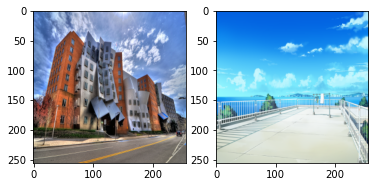

In [41]:
content_path = 'C:/Users/User/Desktop/Python/stata.jpg'
style_path = 'C:/Users/User/Desktop/Python/teahub.io-scenery-wallpaper-download-3050047.png'
%matplotlib inline

content_image = cv2.resize(cv2.imread(content_path), (256, 256),interpolation = cv2.INTER_AREA)
content_image = tf.image.convert_image_dtype(content_image, tf.float32)
style_image = cv2.resize(cv2.imread(style_path), (256, 256),interpolation = cv2.INTER_AREA)
print(tf.shape(content_image))
style_image = tf.image.convert_image_dtype(style_image, tf.float32)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(np.array(content_image), cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(np.array(style_image), cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
def loss_function(style_output,content_output,style_target,content_target):
    alpha=1e-2
    beta=1e-10
    content_loss=0
    style_loss=0
    content_loss=tf.reduce_mean(tf.square(content_output-content_target))
    for target,output in zip(style_output,style_target):
        style_loss+=tf.reduce_mean(tf.square(target-output))
    return (content_loss*alpha/len(content_layers)) + (style_loss*beta/len(style_layers))


model=build_model()
content_image=tf.expand_dims(content_image,axis=0)
content_target=model([content_image*255])[0]
style_image=tf.expand_dims(style_image,axis=0)
style_target=model([style_image*255])[1]
print(tf.shape(content_image))

tf.Tensor([  1 256 256   3], shape=(4,), dtype=int32)


In [43]:
def train_step(image,epoch):
    with tf.GradientTape() as tape:
        model_out=model(image*255)
        loss=loss_function(model_out[1],model_out[0],style_target,content_target)
    gradient=tape.gradient(loss,image)
    opt.apply_gradients([(gradient,image)])
    image.assign(tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0))
    if epoch%10==0 :
        import PIL
        tensor = image*255
        # print(tf.shape(tensor))
        tensor = tf.squeeze(tensor,axis=0)
        tensor = np.array(tensor, dtype=np.uint8)
        # if np.ndim(tensor)>3:
        #     assert tensor.shape[0] == 1
        
        # tensor=tensor[0]
        
        tensor =  PIL.Image.fromarray(tensor)
        plt.imshow(cv2.cvtColor(np.array(tensor), cv2.COLOR_BGR2RGB))
        plt.show()
        
    print(loss)
     

0.1
0


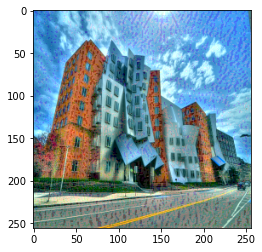

tf.Tensor(1000.4827, shape=(), dtype=float32)
1
tf.Tensor(4181.737, shape=(), dtype=float32)
2
tf.Tensor(5179.141, shape=(), dtype=float32)
3
tf.Tensor(5275.7886, shape=(), dtype=float32)
4
tf.Tensor(5110.282, shape=(), dtype=float32)
5
tf.Tensor(4849.828, shape=(), dtype=float32)
6
tf.Tensor(4522.014, shape=(), dtype=float32)
7
tf.Tensor(4163.6426, shape=(), dtype=float32)
8
tf.Tensor(3758.6013, shape=(), dtype=float32)
9
tf.Tensor(3360.5596, shape=(), dtype=float32)
10


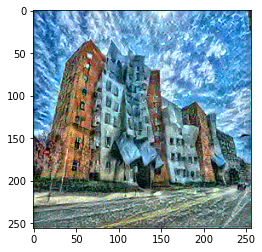

tf.Tensor(2996.9507, shape=(), dtype=float32)
11
tf.Tensor(2685.873, shape=(), dtype=float32)
12
tf.Tensor(2423.9053, shape=(), dtype=float32)
13
tf.Tensor(2212.337, shape=(), dtype=float32)
14
tf.Tensor(2037.0232, shape=(), dtype=float32)
15
tf.Tensor(1882.8593, shape=(), dtype=float32)
16
tf.Tensor(1796.4244, shape=(), dtype=float32)
17
tf.Tensor(1699.8232, shape=(), dtype=float32)
18
tf.Tensor(1619.1664, shape=(), dtype=float32)
19
tf.Tensor(1539.9407, shape=(), dtype=float32)
20


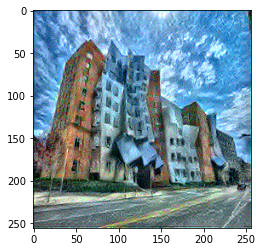

tf.Tensor(1472.3474, shape=(), dtype=float32)
21
tf.Tensor(1406.5476, shape=(), dtype=float32)
22
tf.Tensor(1352.4587, shape=(), dtype=float32)
23
tf.Tensor(1305.3646, shape=(), dtype=float32)
24
tf.Tensor(1256.6995, shape=(), dtype=float32)
25
tf.Tensor(1204.385, shape=(), dtype=float32)
26
tf.Tensor(1183.9761, shape=(), dtype=float32)
27
tf.Tensor(1151.6895, shape=(), dtype=float32)
28
tf.Tensor(1148.5659, shape=(), dtype=float32)
29
tf.Tensor(1127.634, shape=(), dtype=float32)
30


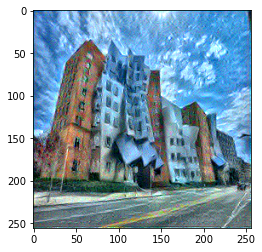

tf.Tensor(1140.9727, shape=(), dtype=float32)
31
tf.Tensor(1095.1885, shape=(), dtype=float32)
32
tf.Tensor(1100.3276, shape=(), dtype=float32)
33
tf.Tensor(1104.2695, shape=(), dtype=float32)
34
tf.Tensor(1072.3124, shape=(), dtype=float32)
35
tf.Tensor(1054.9863, shape=(), dtype=float32)
36
tf.Tensor(1051.8743, shape=(), dtype=float32)
37
tf.Tensor(1051.3756, shape=(), dtype=float32)
38
tf.Tensor(1006.8334, shape=(), dtype=float32)
39
tf.Tensor(1027.6298, shape=(), dtype=float32)
40


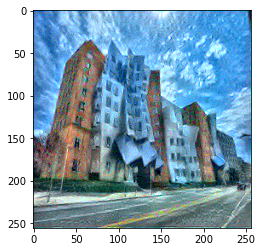

tf.Tensor(978.6011, shape=(), dtype=float32)
41
tf.Tensor(960.76196, shape=(), dtype=float32)
42
tf.Tensor(956.07886, shape=(), dtype=float32)
43
tf.Tensor(948.82336, shape=(), dtype=float32)
44
tf.Tensor(958.08203, shape=(), dtype=float32)
45
tf.Tensor(944.03326, shape=(), dtype=float32)
46
tf.Tensor(946.2373, shape=(), dtype=float32)
47
tf.Tensor(914.1489, shape=(), dtype=float32)
48
tf.Tensor(899.88025, shape=(), dtype=float32)
49
tf.Tensor(901.471, shape=(), dtype=float32)
50


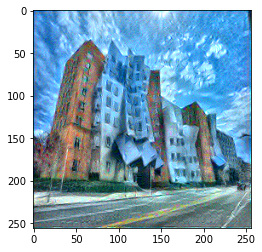

tf.Tensor(880.5508, shape=(), dtype=float32)
51
tf.Tensor(868.5165, shape=(), dtype=float32)
52
tf.Tensor(876.98376, shape=(), dtype=float32)
53
tf.Tensor(869.9852, shape=(), dtype=float32)
54
tf.Tensor(889.8086, shape=(), dtype=float32)
55
tf.Tensor(871.448, shape=(), dtype=float32)
56
tf.Tensor(889.1063, shape=(), dtype=float32)
57
tf.Tensor(890.1322, shape=(), dtype=float32)
58
tf.Tensor(880.3691, shape=(), dtype=float32)
59
tf.Tensor(872.504, shape=(), dtype=float32)
60


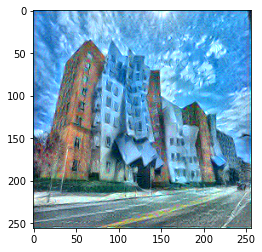

tf.Tensor(855.8251, shape=(), dtype=float32)
61
tf.Tensor(866.0481, shape=(), dtype=float32)
62
tf.Tensor(876.0411, shape=(), dtype=float32)
63
tf.Tensor(884.8191, shape=(), dtype=float32)
64
tf.Tensor(893.57574, shape=(), dtype=float32)
65
tf.Tensor(859.1821, shape=(), dtype=float32)
66
tf.Tensor(861.2256, shape=(), dtype=float32)
67
tf.Tensor(877.573, shape=(), dtype=float32)
68
tf.Tensor(853.55835, shape=(), dtype=float32)
69


KeyboardInterrupt: 

In [44]:
etas=[0.1]

for i in etas: 
    epochs=100
    print(i)
    opt=tf.optimizers.Adam(learning_rate=i,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
    # print(tf.shape(content_image))
    image = tf.image.convert_image_dtype(content_image, tf.float32)
    image=tf.squeeze(image,axis=0)
    image = tf.Variable([image])
    # print(max(image))
    # image=tf.squeeze(image,axis=0)

    # print(tf.shape(image))
    # plt.imshow(image)
    for i in range(epochs):
         print(i)
         train_step(image,i)
       
    

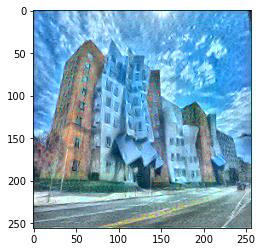

In [ ]:
import PIL
tensor = image*255
tensor = np.array(tensor, dtype=np.uint8)
if np.ndim(tensor)>3:
  assert tensor.shape[0] == 1
  tensor = tensor[0]
tensor =  PIL.Image.fromarray(tensor)
plt.imshow(cv2.cvtColor(np.array(tensor), cv2.COLOR_BGR2RGB))
plt.show()
